In [ ]:
import pandas as pd
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
print("module loaded")

module loaded


In [ ]:
pip install git+https://github.com/amueller/dabl/

  Cloning https://github.com/amueller/dabl/ to /tmp/pip-req-build-tsf7urf2
  Running command git clone --filter=blob:none --quiet https://github.com/amueller/dabl/ /tmp/pip-req-build-tsf7urf2
  Resolved https://github.com/amueller/dabl/ to commit 91f60d71751b618a3eab1501f4f525a442cba90c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dabl: filename=dabl-0.3.1.dev0-py3-none-any.whl size=558422 sha256=4bd6f7aadb9d3a45dc6ff4382827ffa39fb0f25dcc0e559ce956fec1c4e99261
  Stored in directory: /tmp/pip-ephem-wheel-cache-v618wgkk/wheels/5c/d9/b1/d726460fa25042ae2d97f6214d6e800f3075d80bf0d7149a0e
Successfully built dabl


In [ ]:
import dabl

In [ ]:
data=pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
df= pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Target looks like classification


/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:711: UserWarning: Dropped 1 outliers in column Insulin.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:711: UserWarning: Dropped 1 outliers in column SkinThickness.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:614: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:


AttributeError: 'Legend' object has no attribute 'legendHandles'

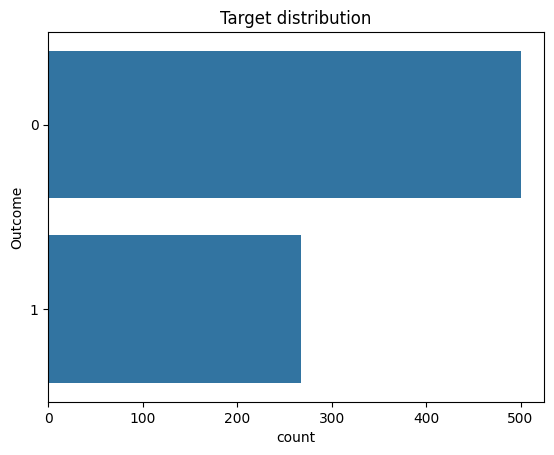

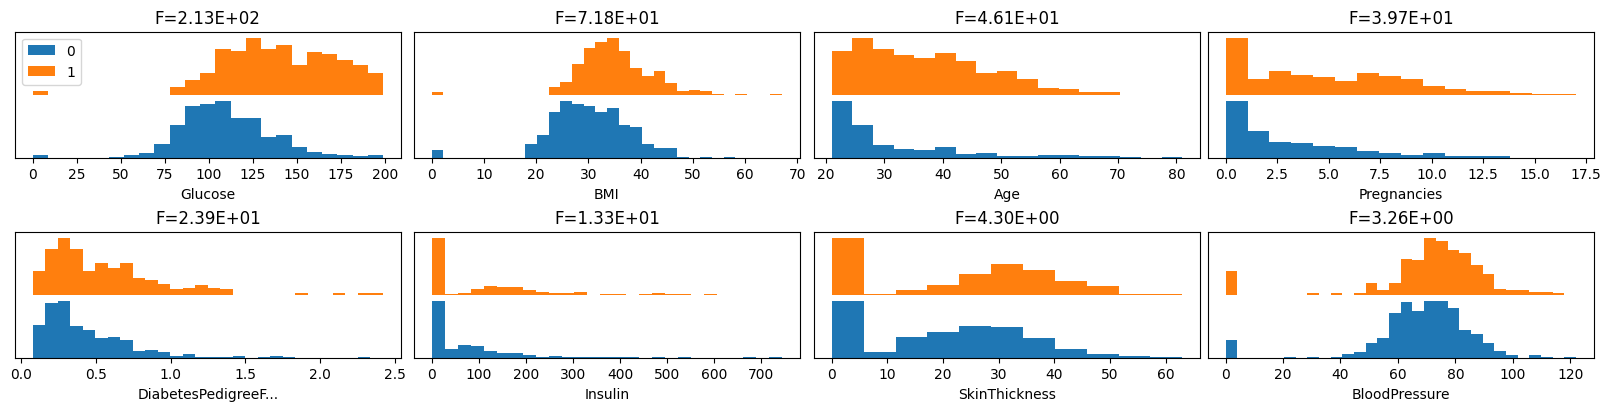

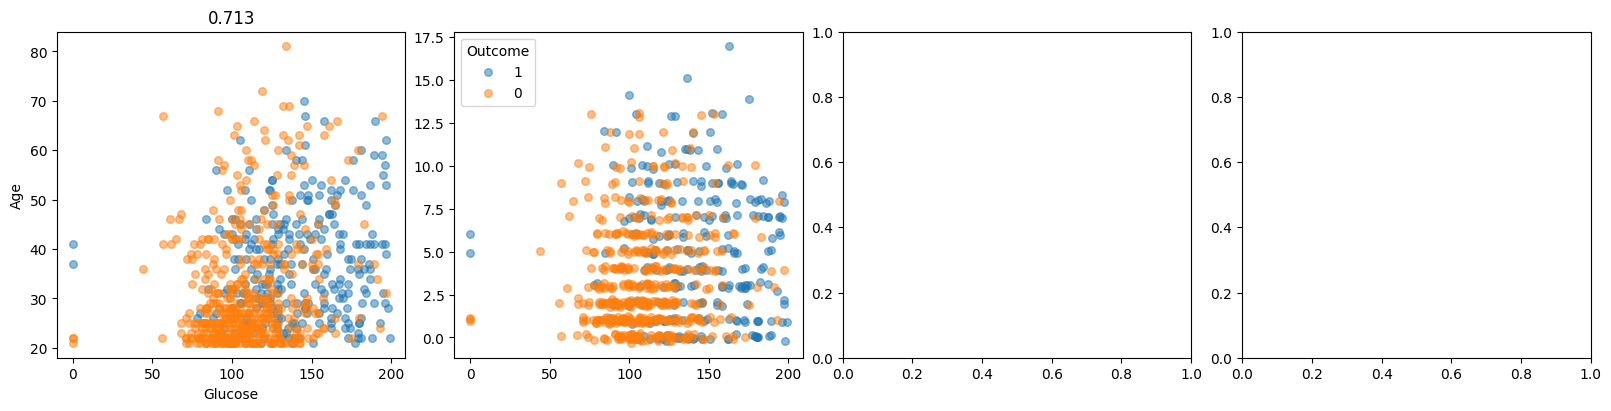

In [ ]:
dabl.plot(df,target_col="Outcome")

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
x_train , x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_train)

(614, 8)
(154, 8)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                

In [ ]:
# Create a decision tree classifier
model = LogisticRegression(max_iter=1500)

In [ ]:
# Fit the classifier to the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Create a pipeline with scaler and model
from sklearn.pipeline import Pipeline

# Create a pipeline that includes StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1500))
])

# Train the pipeline
pipeline.fit(x_train, y_train)

# Test the pipeline
y_pred_pipeline = pipeline.predict(x_test)
pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)
print("Pipeline Accuracy:", pipeline_accuracy)

# Test probability prediction
y_prob_pipeline = pipeline.predict_proba(x_test)
print("Pipeline predict_proba shape:", y_prob_pipeline.shape)
print("First few probabilities:", y_prob_pipeline[:5])

In [ ]:
# Save the complete pipeline
import joblib

# Save the pipeline as diabetes_model.pkl
joblib.dump(pipeline, 'diabetes_model.pkl')
print("Pipeline saved as diabetes_model.pkl")

# Verify the saved model works
loaded_pipeline = joblib.load('diabetes_model.pkl')
test_prediction = loaded_pipeline.predict(x_test[:5])
test_probabilities = loaded_pipeline.predict_proba(x_test[:5])
print("Test prediction:", test_prediction)
print("Test probabilities:", test_probabilities)

In [ ]:
# Assume your trained model variable is `model`
# Define the input shape (1, n_features)
n_features = X_train.shape[1]  # change X_train to your feature variable
initial_type = [('float_input', FloatTensorType([None, n_features]))]

# Convert to ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

NameError: name 'X_train' is not defined